In [61]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [63]:
# Read in data
data = pd.read_csv('../../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica


In [64]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [65]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [66]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [67]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[ 0.92486265  0.62478782  0.31271606  0.39067845  0.05864604 -0.25823887
   1.19473719  0.46934226  1.52280409  1.44798098  0.96530934 -0.11786849
   0.39045995 -0.01536563 -1.16579525  1.42274171 -1.05792792 -0.37744112
   0.05693517  0.47446995  0.40883213  0.59490909  1.5488568   0.6911821
   1.0416753   0.97255213  0.46965731  1.49675177 -0.17472467 -0.20757987]
 [ 1.05639731 -0.15572787  1.3937705   0.19842411  0.91661088  0.36346835
   1.64789062  1.18764079  1.95547479  1.70081248  1.91119425  0.97874048
  -0.500513   -1.23559503 -1.3189726   1.05473471 -0.1649683   1.06495665
  -1.05321765  0.54875395  0.46243508  0.44380094  2.28809564  1.47233242
   0.13794881 -1.00389993 -0.1002084   1.51363367 -1.29316941 -1.64280649]
 [ 1.63708771  0.2334909   1.17532779  1.21034758  0.17778189  0.0535767
   1.09216309  0.65321981  1.64959876  0.93353675  1.4149846   1.24167497
  -0.92196404 -1.44898342 -1.45698109 -1.18937121  0.72311311  2.28254096
   0.47707159  0.36014716  2.27207404 

In [68]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.239286   0.46852693 0.15829981 0.24420945 0.22297145 0.23651805
  0.28770547 0.23513869 0.27199394 0.3465605  0.19444305 0.12676824
  0.59544253 0.65205746 0.38382495 0.56641445 0.10662822 0.05121151
  0.35067075 0.33680437 0.11765175 0.14782786 0.24418091 0.18719902
  0.59331846 0.83128324 0.22254263 0.40095848 0.37190035 0.46871188]
 [0.27292421 0.21466483 0.466634   0.20149648 0.5258461  0.44042129
  0.4526371  0.48225549 0.41924291 0.44625428 0.50070856 0.37954362
  0.24428411 0.19246288 0.32931319 0.39202243 0.26042316 0.21666709
  0.11554903 0.36277625 0.12413031 0.1270957  0.51139803 0.4088395
  0.24032803 0.11518258 0.12587042 0.40778488 0.12153244 0.11158221]
 [0.48778979 0.31680824 0.37506619 0.55429408 0.25118245 0.32306066
  0.25965743 0.28260582 0.30876315 0.20718522 0.30484839 0.49368814
  0.16027336 0.15547966 0.28686186 0.04156312 0.63294862 0.7321214
  0.53378022 0.30041939 0.75821794 0.72507643 0.24442107 0.40396148
  0.16635351 0.05353418 0.65158695 0.19125664 0.

In [69]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.2463125225187832

In [70]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    return gradientDict

y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[-0.07876288,  0.04936775,  0.02939513],
        [ 0.1436571 ,  0.03305444, -0.17671154],
        [-0.10603467,  0.06871368,  0.03732099],
        [ 0.17010007, -0.17061164,  0.00051156]]),
 'gradBias': array([[ 0.08870168,  0.04032904, -0.12903072]])}

In [71]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate, coeff_momentum):
    #Intializes starting variables and matricies which will get updated during momentum calculation
    momentum_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    momentum_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)

        #Calculates Momentum
        momentum_grad_weights = coeff_momentum * momentum_grad_weights + (1-coeff_momentum) * gradients["gradWeights"]
        momentum_grad_bias = coeff_momentum * momentum_grad_bias + (1-coeff_momentum) * gradients["gradBias"]
        
        # Compute gradient descent
        weights = weights - (learning_rate * momentum_grad_weights.transpose())
        bias = bias - (learning_rate * momentum_grad_bias.transpose())

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [72]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.5, coeff_momentum=0.9)

#print(w)
#print(b)

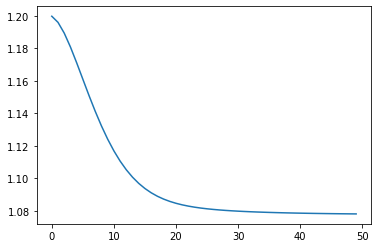

In [73]:
plt.plot(losses)

In [74]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [75]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)


[[2. 4. 1.]
 [4. 4. 0.]
 [4. 8. 3.]]
0.3
